<a href="https://colab.research.google.com/github/GurvGupta/Twitter_Sentiment_analysis/blob/main/SMILE_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/smile-annotations-final.csv')
df.sample()

,611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap,nocode
634,612546991445417984,@tateliverpool lovely picture that,happy


In [3]:
df.columns = ['id','text','category']
df.category.value_counts()

nocode               1571
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: category, dtype: int64

In [4]:
df = df[~df.category.str.contains('\|')]
df = df[df.category != 'nocode']

df.category.value_counts()

happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: category, dtype: int64

In [5]:
possible_labels = df.category.unique()
possible_labels

array(['happy', 'not-relevant', 'angry', 'disgust', 'sad', 'surprise'],
      dtype=object)

In [6]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
  label_dict[possible_label]=index

In [7]:
label_dict

{'happy': 0,
 'not-relevant': 1,
 'angry': 2,
 'disgust': 3,
 'sad': 4,
 'surprise': 5}

In [8]:
df['label'] = df.category.replace(label_dict)

In [9]:
df.sample(6)

,id,text,category,label
2310,615104809423781888,@tateliverpool @DavidSandum sooooo wish I was ...,happy,0
2045,615426298303877120,Looking forward to starting my residency at @I...,happy,0
2296,614071785168990209,#DefiningBeauty wonderful exhibition * * *...,happy,0
2879,614909705031389185,"@notechal1 thank you for the RT, now following...",happy,0
548,612939040598401024,Out with Y7 at the @britishmuseum We've learn...,happy,0
1845,615527909265162240,Wow theyre #3dprinting a very ancient #museum ...,happy,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributio')

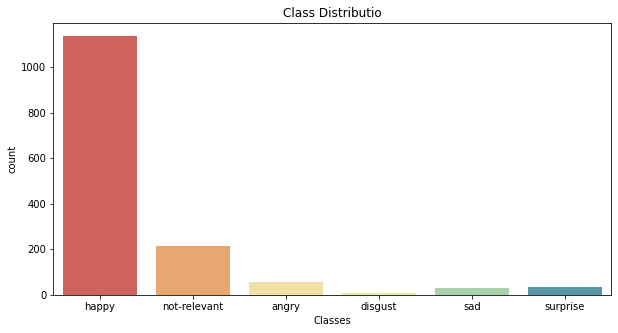

In [10]:
# Looking at the class distributions

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(df.category,palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distributio')

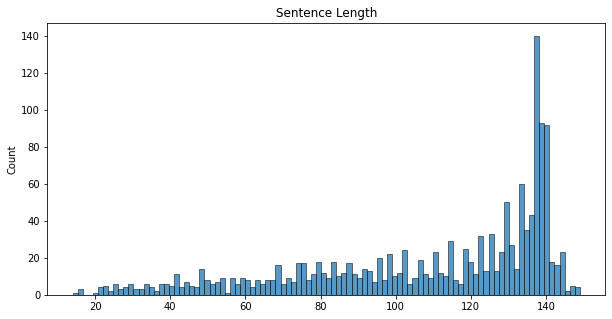

In [11]:
# Plotting sentence length

plt.figure(figsize=(10,5))
sns.histplot([len(s) for s in df.text],bins=100)
plt.title('Sentence Length')
plt.show()

In [12]:
max_len = max([len(sent) for sent in df.text])
print('Max Length : ',max_len)

Max Length :  149


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,df.label.values,test_size=0.15,random_state=17,stratify=df.label.values)

In [14]:
df['data_type'] = ['not_set']*df.shape[0]
df.head()

,id,text,category,label,data_type
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0,not_set
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0,not_set
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy,0,not_set
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0,not_set
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0,not_set


In [15]:
df.loc[X_train,'data_type'] = 'train'
df.loc[X_val,'data_type'] = 'val'

df.groupby(['category','label','data_type']).count()

id  text
category     label data_type           
angry        2     train       48    48
                   val          9     9
disgust      3     train        5     5
                   val          1     1
happy        0     train      966   966
                   val        171   171
not-relevant 1     train      182   182
                   val         32    32
sad          4     train       27    27
                   val          5     5
surprise     5     train       30    30
                   val          5     5

In [16]:
!pip install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 20.2 MB/s 
     |████████████████████████████████| 163 kB 22.8 MB/s 
     |████████████████████████████████| 6.6 MB 64.4 MB/s 


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [17]:
# encode train set

encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type=='train'].text.values,
                                                 add_special_tokens=True,
                                                 return_attention_mask=True,
                                                 pad_to_max_length=True,
                                                 max_length=256,
                                                 return_tensors='pt')

#encode validation set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 256,
                                                return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: 

In [18]:
encoded_data_train

{'input_ids': tensor([[  101, 16092,  3897,  ...,     0,     0,     0],
        [  101,  1030, 27034,  ...,     0,     0,     0],
        [  101,  1030, 10682,  ...,     0,     0,     0],
        ...,
        [  101, 11047,  1030,  ...,     0,     0,     0],
        [  101,  1030,  3680,  ...,     0,     0,     0],
        [  101,  1030,  2120,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [19]:
encoded_data_train['input_ids'][0]

tensor([  101, 16092,  3897,  2007, 10098, 18982,  1001,  2293, 10105,  2015,
         1006,  2013,  1030,  2329,  7606, 14820,  8299,  1024,  1013,  1013,
         1056,  1012,  2522,  1013,  1053,  2549,  2595, 26760,  2140,  2692,
         2229,  2226,  1007,  8299,  1024,  1013,  1013,  1056,  1012,  2522,
         1013,  1044,  2692,  6777, 19279,  2497, 13088,  4160,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [20]:
encoded_data_train['input_ids'][0].size

<function Tensor.size>

In [21]:
encoded_data_train['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
df[df.data_type == 'val'].label.values

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 5, 0, 2, 0, 0,
       1, 0, 4, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0,
       0, 0, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [23]:
import tensorflow as tf
import torch

In [24]:
# train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

In [25]:
#validation set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type == 'val'].label.values)


In [26]:
# I will load the pre-trained model of bert-base-uncased

from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels=len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [27]:
# Creating Data Loaders
from torch.utils.data import TensorDataset

In [28]:
#train set
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

In [29]:
#validation set
dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [30]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [31]:
batch_size = 32

# train data
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

# validation set
dataloader_val = DataLoader(dataset_val,
                            sampler = RandomSampler(dataset_val),
                            batch_size = 32) #Since we don't have to do backpropagation for this step.



In [32]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [33]:
optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8) #2e-5 > 5e-5

epochs=10

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps = len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [34]:
import numpy as np

def evaluate(dataloader_val):

  # evaluation mode
  model.eval()

  # tracking variables
  loss_val_total = 0
  predictions, true_vals = [],[]

  for batch in tqdm(dataloader_val):
    # load into GPU
    batch = tuple(b.to(device) for b in batch)

    # define inputs
    inputs = {'input_ids' : batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    # computing logits
    with torch.no_grad():
      outputs = model(**inputs)

    # computing loss
    loss = outputs[0]
    logits = outputs[1]
    loss_val_total += loss.item()

    # computing accuracy
    logits = logits.detach().cpu().numpy()
    label_ids = inputs['labels'].cpu().numpy()
    predictions.append(logits)
    true_vals.append(label_ids)

  loss_val_avg = loss_val_total/len(dataloader_val) 
    
  predictions = np.concatenate(predictions, axis=0)
  true_vals = np.concatenate(true_vals, axis=0)
            
  return loss_val_avg, predictions, true_vals


In [35]:
from sklearn.metrics import f1_score

In [36]:
def f1_sccore_func(preds,labels):
  preds_flat = np.argmax(preds,axis=1).flatten()
  labels_flat = labels.flatten()

  return f1_score(labels_flat,preds,average='weighted')

In [37]:
# accuracy score

def accuracy_per_class(preds,labels):
  label_dict_inverse = {v : k for k,v in label_dict.items()}

  # making prediction
  preds_flat = np.argmax(preds,axis=1).flatten()
  labels_flat = labels.flatten()

  for label in np.unique(labels_flat):
    y_preds = preds_flat[labels_flat==label]
    y_true = labels_flat[labels_flat==label]
    print(f'Class : {label_dict_inverse[label]}')

In [38]:
# Train Model
# Setting seeds for reproducibility

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)

In [ ]:
from tqdm import tqdm
device = torch.device('cuda:0') 
for epoch in tqdm(range(1,epochs+1)):
  model.train()
  loss_train_total=0
  progress_bar = tqdm(dataloader_train,
                      desc = 'Epoch {:1d}'.format(epoch),
                      leave = False,
                      disable=False)
  
  for batch in progress_bar:
    
    model.zero_grad() #it means setting gradient to 0
    inputs = {'input_ids' : batch[0],
              'attention_mask' : batch[1],
              'labels':batch[2]}

    batch = tuple(b.to(device) for b in batch)

    
    outputs = model(**inputs) #it means unpacking the dictionar straight into inputs
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)

    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})

  torch.save(model.state_dict(), f'Models/BERT_ft_epoch{epoch}.model')

  tqdm.write('\n Epoch {epoch}')

  loss_train_ave = loss_train_total/len(dataloader)
  tqdm.write('Training  loss : {loss_train_avg}')

  val_loss, predictions, true_vals = evaluate(dataloader_val)
  val_f1 = f1_sccore_func(predictions,true_vals)
  tqdm.write(f'Validation Loss : {val_loss}')
  tqdm.write(f'F1 Score (weighted) : {val_f1}')

Epoch 1:   2%|▎         | 1/40 [01:22<53:30, 82.31s/it, training_loss=0.647]